# Visualizing recall

In [368]:
import json
import numpy as np
import matplotlib.pyplot as plt

## Read 2020 and 2021 data from json

In [369]:
with open("../data/analysis/2020_recall.json") as f:
    data_2020 = json.load(f)

total_recalls_2020 = data_2020["total_recalls"]

with open("../data/analysis/2021_recall.json") as f:
    data_2021 = json.load(f)

total_recalls_2021 = data_2021["total_recalls"]

## Data assembly and plot functions

In [370]:
def assemble_bar_stacks(data, format_strs, numbered_prevs=5, value="recall", include_first=True, include_prev_all=True):
    stacks = []
    if include_first:
        stacks.append([data[format_str.split("+")[0]][value] for format_str in format_strs])
    for i in range(numbered_prevs):
        stack = [data[format_str.format("_prev_" + str(i + 1))][value] for format_str in format_strs]
        stacks.append(stack)
    if include_prev_all:
        stacks.append([data[format_str.format("_prev_all")][value] for format_str in format_strs])

    return np.array(stacks)

In [371]:
def plot_average_bars(labels, bars, title, legend, colors, width=0.1, ylabel="Recall", f_name=None, f_format="pdf", legend_loc="upper left"):
    """Creates a grouped barplot from the input data, saves it, and shows it.

    Args:
        labels: List of labels to use for each group in the plot.
        bars: Data to plot; generated by the 'assemble_bar_stacks' function.
        title: Plot title.
        legend: List of legend labels for each bar in all group.
        colors: List of colors to be used for each bar in all groups.
        width: Width of all bars. Defaults to 0.1.
        ylabel: Ylabel that describes wheter recall or candidate pool sizes are
            shown. Defaults to "Recall".
        f_name: If specified, the file path to save the figure at. Defaults to
            None.
        f_format: Format to save the file with. Defaults to "pdf".
        legend_loc: Matplotlib value for legend location. Defaults to
            "upper left".
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Stacked bar plot
    if type(bars) is np.ndarray:
        pos = list(range(bars.shape[1]))
        xlabels = [f"Prev_{i}" for i in range(bars.shape[0])]
        xlabels[-1] = "Prev_all"

        for i in range(bars.shape[0]):
            plt.bar([p + width * i for p in pos], bars[i,:], width, color=plt.cm.Greys_r(colors[i]), alpha=1, label=xlabels[i], edgecolor="black")

        ax.set_ylabel(ylabel, fontsize=16)
        ax.set_title(title, fontsize=18)
        ax.set_xticks([p + 3 * width for p in pos])
        ax.set_xticklabels(labels, fontsize=16)
        ax.tick_params("y", labelsize=14)

        plt.xlim(min(pos) - width, max(pos) + width * bars.shape[0] + width / 2)
        plt.ylim([0, np.amax(bars) + np.amax(bars) / 100])

        plt.legend(legend, loc=legend_loc, ncol=2, fontsize=11)
        
        plt.grid()
        if f_name:
            plt.savefig("figures/{}.{}".format(f_name, f_format), format=f_format, bbox_inches="tight")
        plt.show()

    ax.set_ylabel(ylabel)
    ax.set_title(title)

## Plot recall

In [372]:
# Plot config used for all plots
format_strs = ["raw+raw{}", "automatic+automatic{}", "manual+manual{}"]
labels = ["(R)aw", "(A)utomatic", "(M)anual"]
legend = [r"$X_n$", r"$X_{n, n-1}$", r"$X_{n, \dots, n-2}$", r"$X_{n, \dots, n-3}$", r"$X_{n, \dots, n-4}$", r"$X_{n, \dots, n-5}$", r"$X_{n, \dots, 1}$"]

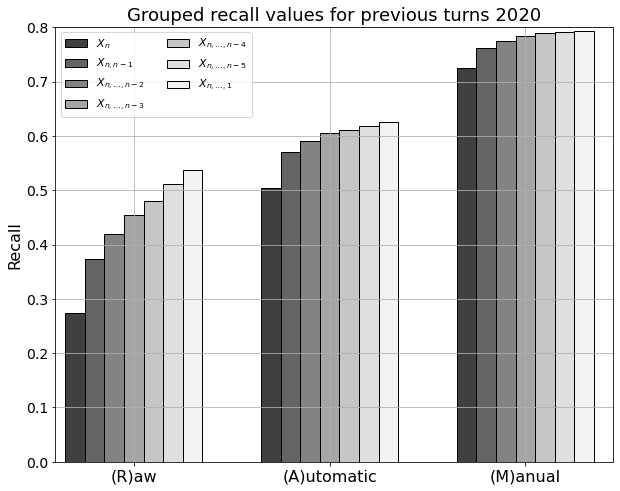

In [373]:
bars = assemble_bar_stacks(total_recalls_2020, format_strs, include_prev_all=True)
colors = list(np.linspace(0.2, 0.9, bars.shape[0]))

plot_average_bars(labels, bars, "Grouped recall values for previous turns 2020", legend, colors, f_name="recall_2020")

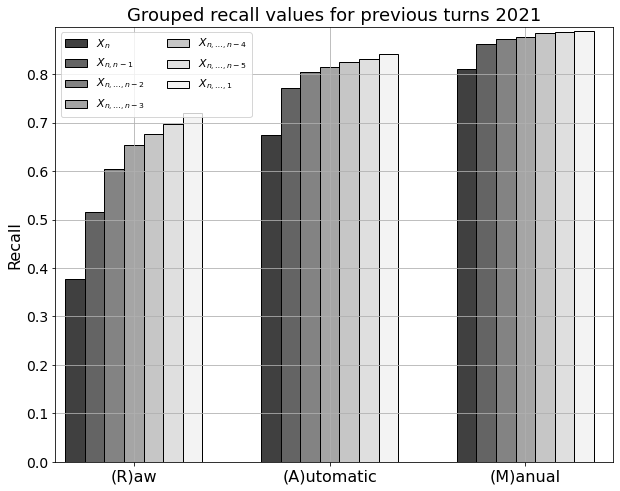

In [374]:
bars = assemble_bar_stacks(total_recalls_2021, format_strs, include_prev_all=True)

plot_average_bars(labels, bars, "Grouped recall values for previous turns 2021", legend, colors, f_name="recall_2021")

## Plot candidate pools

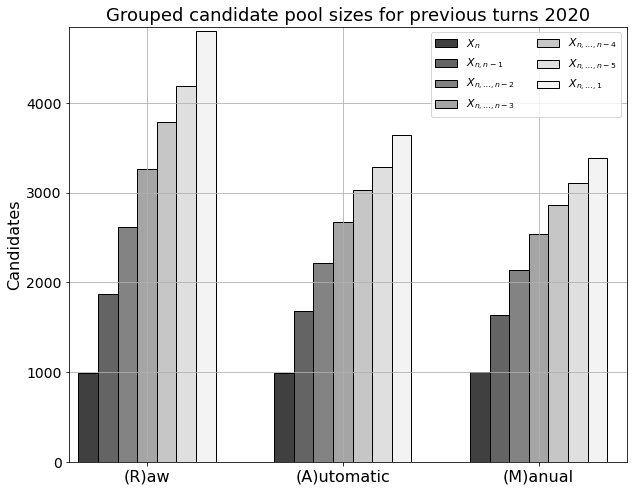

In [375]:
bars = assemble_bar_stacks(total_recalls_2020, format_strs, value="num_avg_candidates", include_prev_all=True)

plot_average_bars(labels, bars, "Grouped candidate pool sizes for previous turns 2020", legend, colors, ylabel="Candidates", f_name="pool_sizes_2020", legend_loc="upper right")

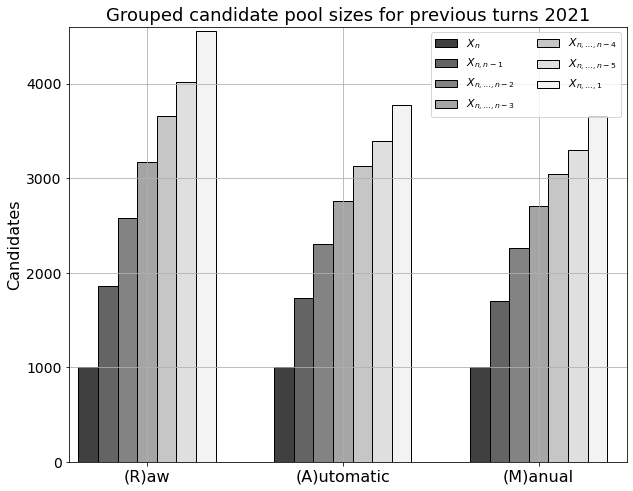

In [376]:
bars = assemble_bar_stacks(total_recalls_2021, format_strs, value="num_avg_candidates", include_prev_all=True)

plot_average_bars(labels, bars, "Grouped candidate pool sizes for previous turns 2021", legend, colors, ylabel="Candidates", f_name="pool_sizes_2021", legend_loc="upper right")